### Data Science Tutorial on VS Code website
#### https://code.visualstudio.com/docs/datascience/data-science-tutorial

### Machine learning example using naive bayes algorithm

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [2]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

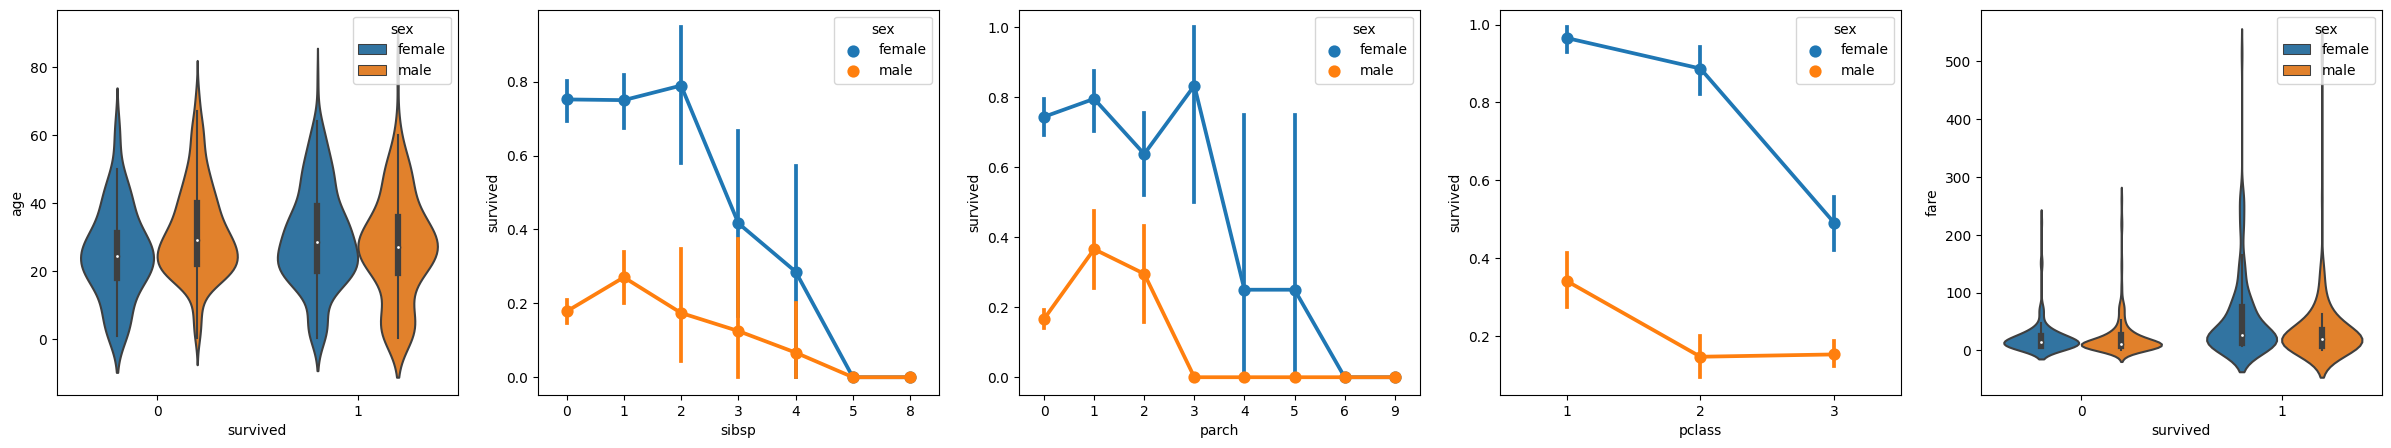

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
data.replace({'male': 1, 'female': 0}, inplace=True)

#### correlation returning absolute values

In [5]:
data.corr().abs()[['survived']]

/var/folders/x0/qlrrbry95d9_785gqlg1l1dm0000gn/T/ipykernel_18953/3910233885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[['survived']]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


#### correlation returning calculated values

In [6]:
data.corrwith(data['survived'])


/var/folders/x0/qlrrbry95d9_785gqlg1l1dm0000gn/T/ipykernel_18953/1388354452.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['survived'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


pclass     -0.312469
survived    1.000000
sex        -0.528693
age        -0.055512
sibsp      -0.027825
parch       0.082660
fare        0.244265
body             NaN
dtype: float64

#### correlation siblings or spouse, and parents or children

In [7]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[['survived']]

/var/folders/x0/qlrrbry95d9_785gqlg1l1dm0000gn/T/ipykernel_18953/1678519043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[['survived']]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [8]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


### Same dataset and analysis but using a neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [14]:
model.add(Dense(5, kernel_initializer= 'uniform', activation= 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xmodel.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5849
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5873
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6172
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.7297
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.7452
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.7620
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7703
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7727
Epoch 11/50
27/27 [

In [17]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.7894736842105263


#### Result is nearly 79% accuracy using the neural network as opposed to using naive bayes algorithm